In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

**Q1.** Given the following data, build a decision tree with *three* leaves.

x|y
-|-
0|4
1|5
2|6
4|100

Use MSE as the mesure of quality in the nodes. That means, we have an impurity (entropy in case of classification) $$H(R)=\frac{1}{N}\sum(y_i-y_{*})^2.$$
To find the minimum, we can take a derivative $$H'(R)=\frac{2}{N}\sum(y_i-y_{*})=0 =2(\frac{1}{N}\sum y_i -y_{*})\Rightarrow y_{*}=\bar{y}.$$ And quality of the split is given by
$$Q=H(R)-\frac{|R_l|}{|R|}H(R_l)-\frac{|R_r|}{|R|}H(R_r)\to max.$$
$$\tilde{Q}=\frac{|R_l|}{|R|}H(R_l)+\frac{|R_r|}{|R|}H(R_r)\to \min.$$

In [2]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [3]:
X = np.array([0, 1, 2, 4]).reshape(-1,1)
y = np.array([4, 5, 6, 100])

In [4]:
reg.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [5]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[0] <= 3.0\nsquared_error = 1692.688\nsamples = 4\nvalue = 28.75'),
 Text(0.4, 0.5, 'x[0] <= 0.5\nsquared_error = 0.667\nsamples = 3\nvalue = 5.0'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 5.5'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 100.0')]

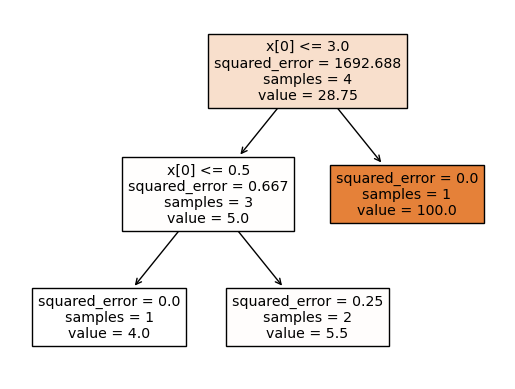

In [6]:
plot_tree(reg, filled=True)

In [7]:
X_test = np.arange(0,5,0.05)
y_pred = reg.predict(X_test.reshape(-1,1))

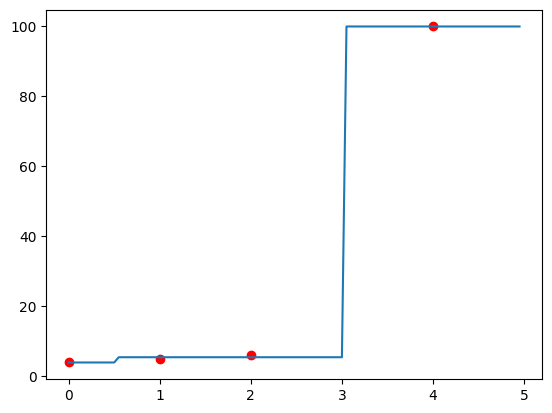

In [8]:
plt.plot(X_test, y_pred)
plt.scatter(X,y, c='red')

Q2. Construct a Decision Stamp for the following data:

x|y
-|-
0.7|1
0.6|-1
0.7|-1
0.2|1
0.4|-1

In [9]:
X = np.array([0.7, 0.6, 0.7, 0.2, 0.4]).reshape(-1,1)
y = np.array([1, -1, -1, 1, -1])

In [10]:
from sklearn.tree import DecisionTreeClassifier

[Text(0.5, 0.75, 'x[0] <= 0.3\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]')]

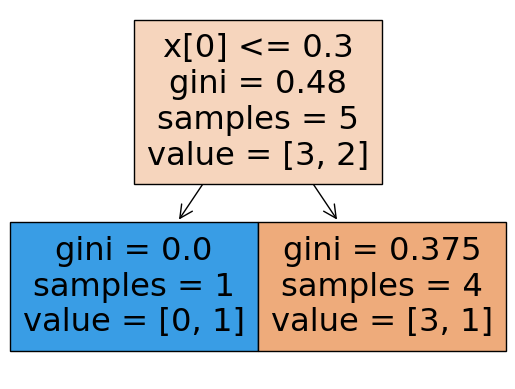

In [11]:
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X,y)
plot_tree(clf, filled=True)

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

In [14]:
from mlxtend.plotting import plot_decision_regions

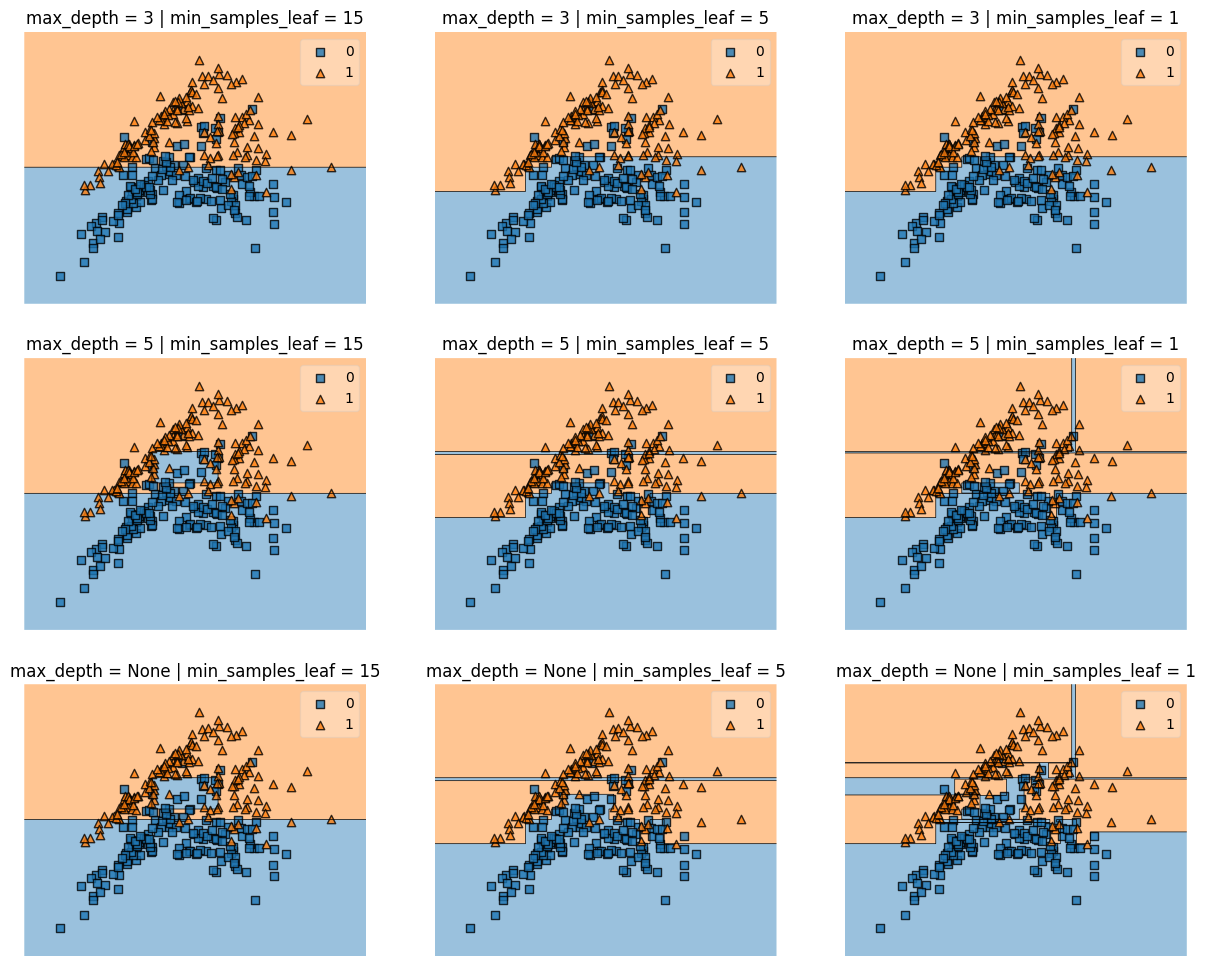

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
models = []
for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        models.append(('dt'+str(i)+str(j), dt))
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

# Ensemble of Models

## Vote

## Bootstrap Aggregation (Bagging)

## Stacking

## Boosting

In [16]:
from sklearn.ensemble import VotingClassifier

In [17]:
clf_vote = VotingClassifier(models, voting='hard')

In [18]:
clf_vote.fit(X,y)

VotingClassifier(estimators=[('dt00',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_leaf=15,
                                                     random_state=13)),
                             ('dt01',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_leaf=5,
                                                     random_state=13)),
                             ('dt02',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=13)),
                             ('dt10',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=15,
                                                     random_state=13)),
                             ('dt11',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=5,
                                                     random_state=13)),
                             ('dt12',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=13)),
                             ('dt20',
                              DecisionTreeClassifier(min_samples_leaf=15,
                                                     random_state=13)),
                             ('dt21',
                              DecisionTreeClassifier(min_samples_leaf=5,
                                                     random_state=13)),
                             ('dt22', DecisionTreeClassifier(random_state=13))])

<Axes: >

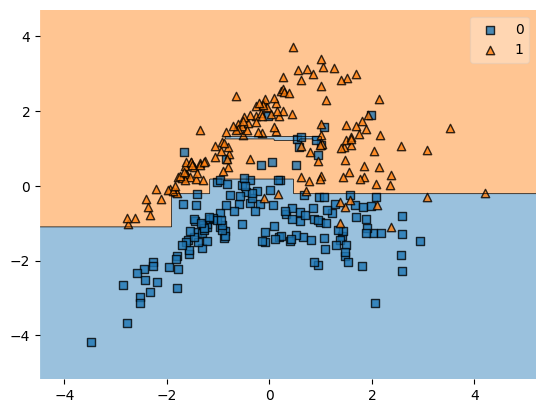

In [19]:
plot_decision_regions(X, y, clf_vote)

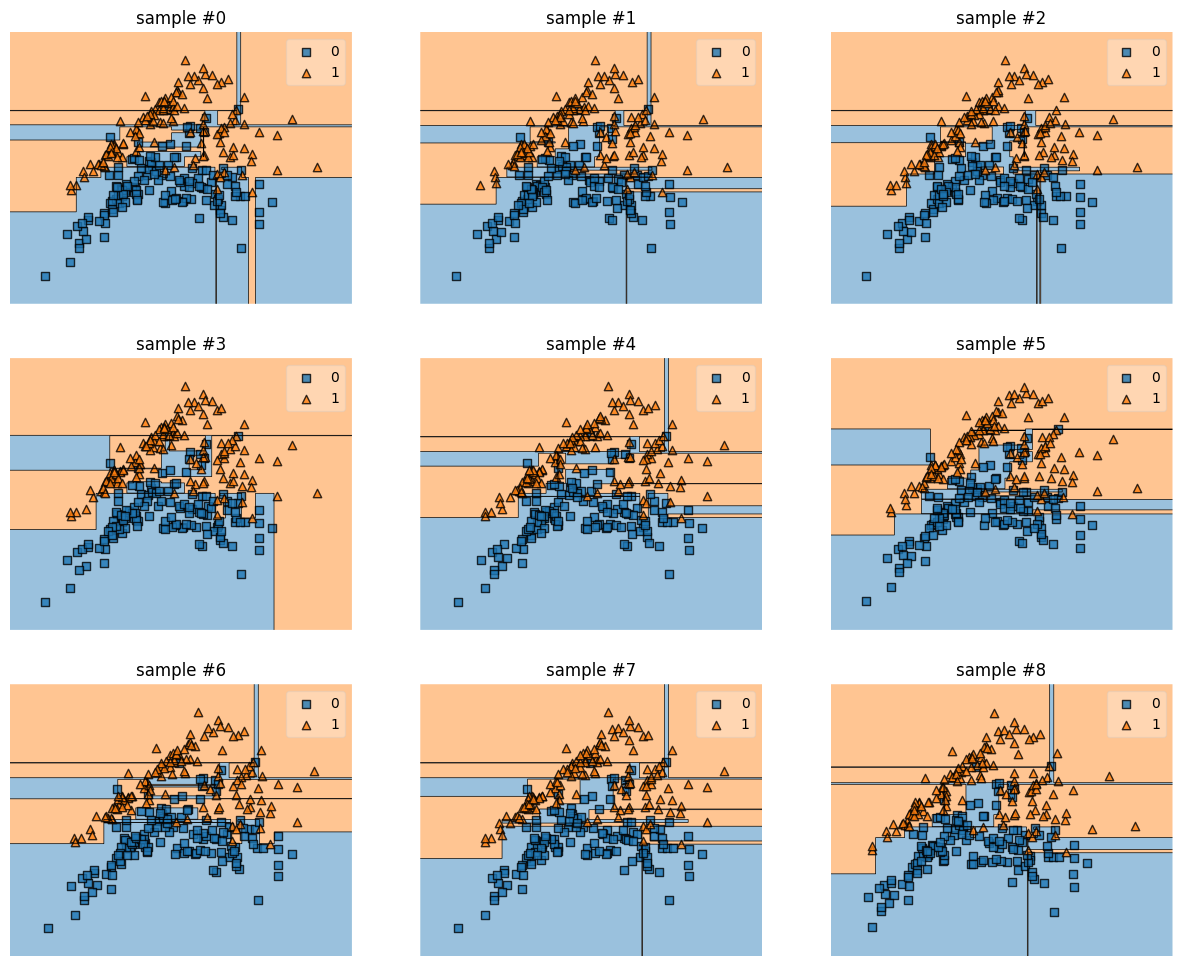

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=13), n_estimators=9, max_samples=0.9, bootstrap=False, random_state=13).fit(X, y)

<Axes: >

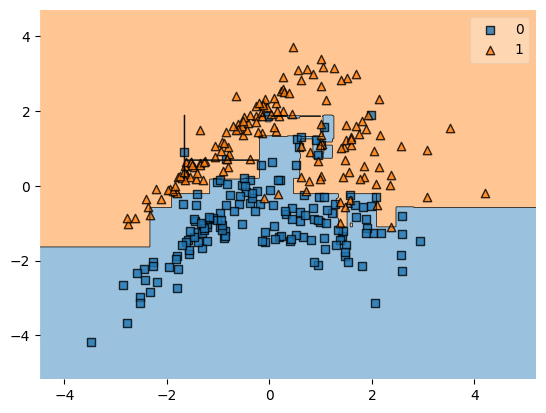

In [23]:
plot_decision_regions(X,y,clf)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(6)), 'min_samples_leaf': list(range(5))}

In [ ]:
clf = GridSearchCV(dt, params, scoring='f1')

In [ ]:
clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4]},
             scoring='f1')

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [ ]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4, random_state=13), n_estimators=40, max_samples=0.8, bootstrap=True, random_state=13).fit(X, y)

<Axes: >

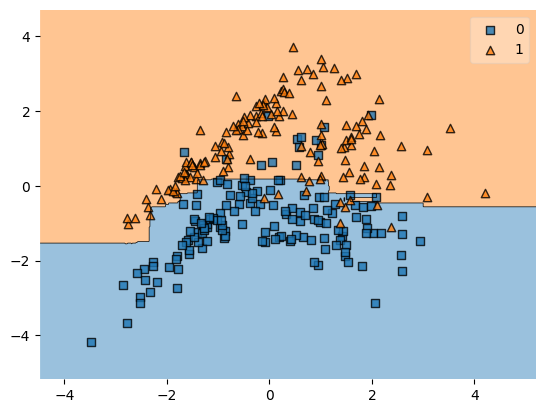

In [ ]:
plot_decision_regions(X,y,clf)